<h1>Colic in horses</h1>

<h4>Data description</h4>

In [74]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# SK learn Models->  https://scikit-learn.org/stable/
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
# sklearn hold out 
from sklearn.model_selection import train_test_split
# sklearn 10FCV 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
# confusion matrix
from sklearn.metrics import confusion_matrix

filename = 'horse-colic-clean.csv'
colNames = [
    'sur',
    'age',
    'hos',
    'rec',
    'pul',
    'res',
    'tem',
    'pro',
    'out'
]

data = pd.read_csv(filename, names=colNames)
array = data.values

print((data == 0).sum())
print()
print((data < 0).sum())
print()
print(data.std())
print()
print(data.mean())


sur      0
age      0
hos      0
rec      0
pul      0
res      0
tem      0
pro      0
out    166
dtype: int64

sur     1
age     0
hos     0
rec     0
pul     0
res     0
tem    47
pro     0
out     0
dtype: int64

sur    3.132792e+00
age    2.170687e+00
hos    1.461653e+06
rec    6.705328e-01
pul    2.863056e+01
res    1.644023e+01
tem    1.972490e+01
pro    2.647504e+01
out    4.904893e-01
dtype: float64

sur    1.217391e+00
age    1.637681e+00
hos    1.030920e+06
rec    3.815214e+01
pul    7.191304e+01
res    3.058475e+01
tem   -6.590580e+00
pro    2.520160e+01
out    3.985507e-01
dtype: float64


<h4>Attribute plots</h4>

Attribue: SUR
Summary:
N outside of two STD:	 1 	( 0.36 %)
N outside of three STD:	 1 	( 0.36 %)


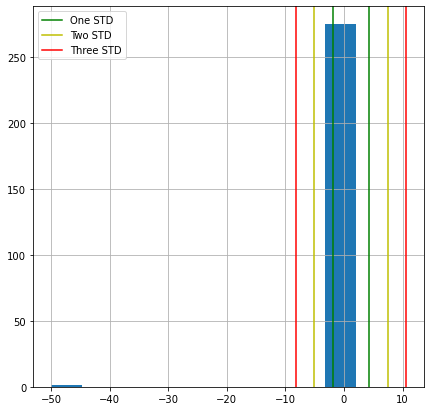

Attribue: AGE
Summary:
N outside of two STD:	 22 	( 7.97 %)
N outside of three STD:	 22 	( 7.97 %)


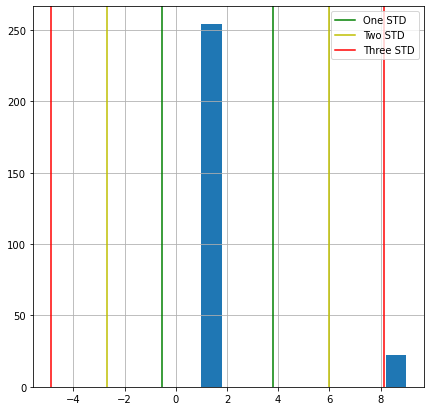

Attribue: HOS
Summary:
N outside of two STD:	 29 	( 10.51 %)
N outside of three STD:	 0 	( 0.0 %)


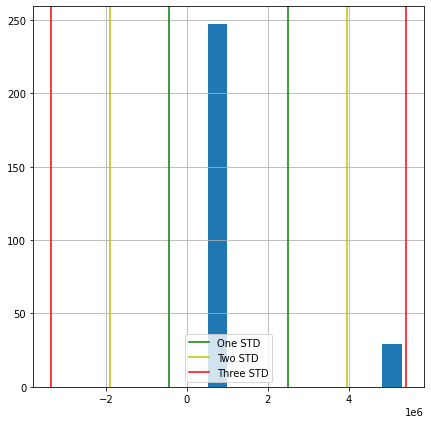

Attribue: REC
Summary:
N outside of two STD:	 18 	( 6.52 %)
N outside of three STD:	 6 	( 2.17 %)


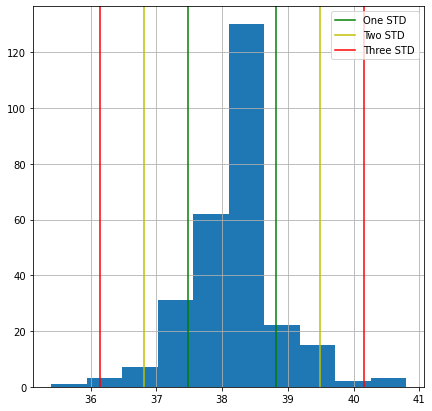

Attribue: PUL
Summary:
N outside of two STD:	 12 	( 4.35 %)
N outside of three STD:	 3 	( 1.09 %)


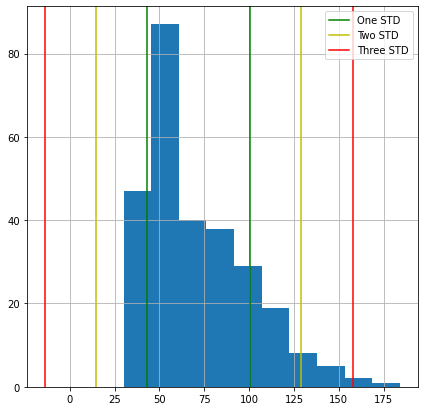

Attribue: RES
Summary:
N outside of two STD:	 17 	( 6.16 %)
N outside of three STD:	 10 	( 3.62 %)


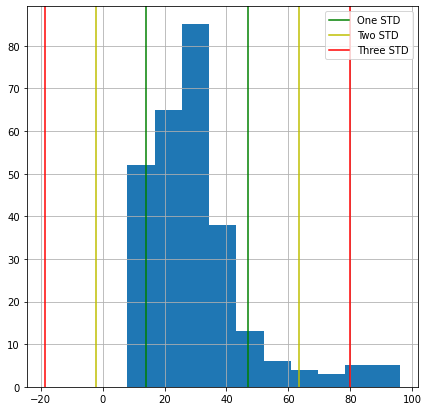

Attribue: TEM
Summary:
N outside of two STD:	 47 	( 17.03 %)
N outside of three STD:	 0 	( 0.0 %)


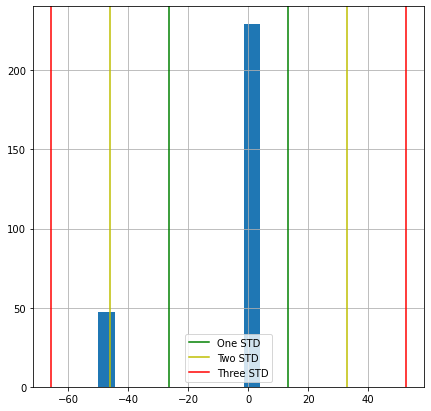

Attribue: PRO
Summary:
N outside of two STD:	 8 	( 2.9 %)
N outside of three STD:	 0 	( 0.0 %)


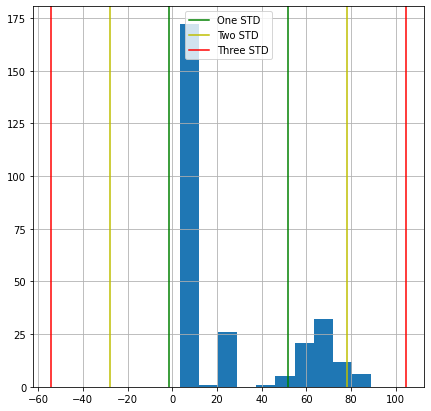

In [75]:
def plotAttribute(featureName):
    oneSTD = data[featureName].std()
    twoSTD = oneSTD * 2
    threeSTD = oneSTD * 3
    meanValue = data[featureName].mean()
    
    print("Attribue:", featureName.upper())
    print("Summary:")
    instances = data.shape[0]
    outsideTwo = ((data[featureName] < (meanValue - twoSTD)).sum() + (data[featureName] > (meanValue + twoSTD)).sum())
    outsideThree = ((data[featureName] < (meanValue - threeSTD)).sum() + (data[featureName] > (meanValue + threeSTD)).sum())
    
    print("N outside of two STD:\t", outsideTwo, "\t(", round((outsideTwo/instances) *100, 2),"%)")
    print("N outside of three STD:\t", outsideThree, "\t(", round((outsideThree/instances) * 100, 2),"%)")
    

    plt.axvline(x=(meanValue - oneSTD), label='One STD', c="g")
    plt.axvline(x=(meanValue + oneSTD), c="g")
    
    plt.axvline(x=(meanValue - twoSTD), label='Two STD', c="y")
    plt.axvline(x=(meanValue + twoSTD), c="y")
    
    plt.axvline(x=(meanValue - threeSTD), label='Three STD', c="r")
    plt.axvline(x=(meanValue + threeSTD), c="r")
    
    data[featureName].hist(figsize=(7,7))
    plt.legend()
    plt.show()
 

for attribute in colNames[:-1]:
    plotAttribute(attribute)

<h4>Hold out method</h4>

In [76]:
##Hold out method for horse

X = array[:,0:8]
Y = array[:,8]

# Set the siz of the training and test set (in percentage)
test_size = 0.33

# random seed for the data
seed = 1

# Returns 4 lists
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=test_size, random_state=seed)

<h4>Prediction algorithms</h4>

In [77]:
##Gaussian naive bayes
print("Naive Bayes:\n------------------------------------")
model = GaussianNB()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy:", round(result*100.0,2), "%")
# make predictions on unseen data
y_pred = model.predict(X_test)

conf_mat = confusion_matrix(Y_test, y_pred)
print()
print(conf_mat)

# overall TP, FP, TN, FN values, for binary values only, what is tp and tn?
print()
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print("TP:",tp)
print("FP:",fp)
print("TN:",tn)
print("FN:",fn)

##Swapped formulas because 0 is the positive class and 1 the negative
sensitivity = tn / (tn + fp)
specificity = tp / (tp + fn)

print()
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")

##Gaussian Process Classifier
print("\nGaussian Process Classifier:\n------------------------------------")
kernel = 1.0 * RBF(1.0)
clf = GaussianProcessClassifier(kernel=kernel,
        random_state=0)
clf.fit(X_train, Y_train)
result = clf.score(X_test, Y_test)
print("Accuracy:", round(result*100.0,2), "%")
# make predictions on unseen data
y_pred = clf.predict(X_test)


conf_mat = confusion_matrix(Y_test, y_pred)
print()
print(conf_mat)

# overall TP, FP, TN, FN values, for binary values only, what is tp and tn?
print()
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print("TP:",tp)
print("FP:",fp)
print("TN:",tn)
print("FN:",fn)

##Swapped formulas because 0 is the positive class and 1 the negative
sensitivity = tn / (tn + fp)
specificity = tp / (tp + fn)

print()
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")

Naive Bayes:
------------------------------------
Accuracy: 57.61 %

[[49  5]
 [34  4]]

TP: 4
FP: 5
TN: 49
FN: 34

Sensitivity: 90.74 %
Specificity: 10.53 %

Gaussian Process Classifier:
------------------------------------
Accuracy: 64.13 %

[[49  5]
 [28 10]]

TP: 10
FP: 5
TN: 49
FN: 28

Sensitivity: 90.74 %
Specificity: 26.32 %


<p>In the second algorithm, we predicted that 28 would survive but they did not. Both algorithms perform badly because the specificity is too low for a case where we're talking about survival or not. There are far too many type-II errors. Despite both algorithms performing badly, out of the 2, I would choose the Gaussian Process Classifier because it has a higher accuracy and a not so low specificity. However, both algorithms perform poorly.</p>

<h4>10-fold validation</h4>

In [78]:
##10-fold validation
# Folds and seed
num_folds = 10
seed = 1

print("Naive Bayes:\n------------------------------------")
kfold = KFold(n_splits=num_folds, random_state=seed)
model = GaussianNB()
results = cross_val_score(model, X, Y, cv=kfold)
print("Accuracy:", round(results.mean()*100.0,2),"% Standard Deviation", round(results.std()*100.0,2))

# over all confusion matrix
y_pred = cross_val_predict(model, X, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)

print(conf_mat)
# overall TP, FP, TN, FN values, for binary values only, what is tp and tn?
print()

tn, fp, fn, tp = confusion_matrix(Y, y_pred).ravel()
print("TP:",tp)
print("FP:",fp)
print("TN:",tn)
print("FN:",fn)

##Swapped formulas because 0 is the positive class and 1 the negative
sensitivity = tn / (tn + fp)
specificity = tp / (tp + fn)

print()
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")


##Gaussian Process Classifier
print("\nGaussian Process Classifier:\n------------------------------------")
kernel = 1.0 * RBF(1.0)
clf = GaussianProcessClassifier(kernel=kernel,
        random_state=0)
clf.fit(X_train, Y_train)
results = cross_val_score(clf, X, Y, cv=kfold)
print("Accuracy:", round(results.mean()*100.0,2),"% Standard Deviation", round(results.std()*100.0,2))

# over all confusion matrix
y_pred = cross_val_predict(clf, X, Y, cv=10)
conf_mat = confusion_matrix(Y, y_pred)

print(conf_mat)
# overall TP, FP, TN, FN values, for binary values only, what is tp and tn?
print()

tn, fp, fn, tp = confusion_matrix(Y, y_pred).ravel()
print("TP:",tp)
print("FP:",fp)
print("TN:",tn)
print("FN:",fn)

##Swapped formulas because 0 is the positive class and 1 the negative
sensitivity = tn / (tn + fp)
specificity = tp / (tp + fn)

print()
print("Sensitivity:", round(sensitivity * 100, 2), "%")
print("Specificity:", round(specificity * 100, 2), "%")

Naive Bayes:
------------------------------------
Accuracy: 57.2 % Standard Deviation 6.5
[[155  11]
 [104   6]]

TP: 6
FP: 11
TN: 155
FN: 104

Sensitivity: 93.37 %
Specificity: 5.45 %

Gaussian Process Classifier:
------------------------------------
Accuracy: 69.17 % Standard Deviation 6.03
[[148  18]
 [ 68  42]]

TP: 42
FP: 18
TN: 148
FN: 68

Sensitivity: 89.16 %
Specificity: 38.18 %


Based on the output, I would choose the Gaussian Process Classifier algorithm again both because of it's higher accuracy and specifity. However, it must be said that specifity is very imortant with this dataset because it determines the percentage of horses we correctly identified to survive. And, as we can see, even the best performing algorithm out of the 2 misdiagnosd that 61.82% of horses that were predicted to survive, ended up not surviving. Therefore, I would not recommend using these 2 algorithms with this dataset due to the excessive number of type-II errors.

<h2>Car MPG</h2>

<h4>Data description</h4>

In [79]:
filename = 'auto-mpg.csv'
colNames = [
    'mpg',
    'cyl',
    'dis',
    'hp',
    'weight',
    'acc',
    'myear',
    'origin',
    'cname'
]

data = pd.read_csv(filename, names=colNames)
array = data.values

print(data.dtypes)
data.describe()


mpg       float64
cyl         int64
dis       float64
hp          int64
weight      int64
acc       float64
myear       int64
origin      int64
cname     float64
dtype: object


,mpg,cyl,dis,hp,weight,acc,myear,origin,cname
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,0.0
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN


<h4>Attribute plots</h4>

Attribue: MPG
Summary:
N outside of two STD:	 10 	( 2.51 %)
N outside of three STD:	 0 	( 0.0 %)


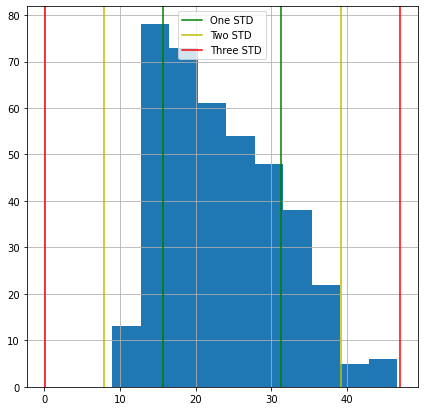

Attribue: CYL
Summary:
N outside of two STD:	 0 	( 0.0 %)
N outside of three STD:	 0 	( 0.0 %)


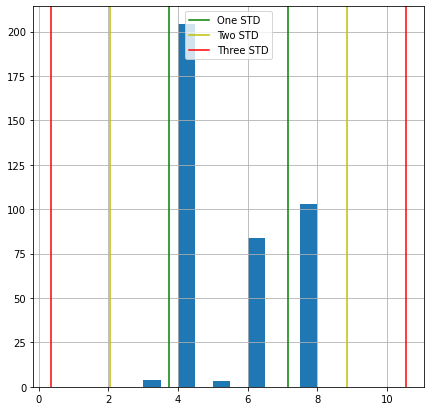

Attribue: DIS
Summary:
N outside of two STD:	 9 	( 2.26 %)
N outside of three STD:	 0 	( 0.0 %)


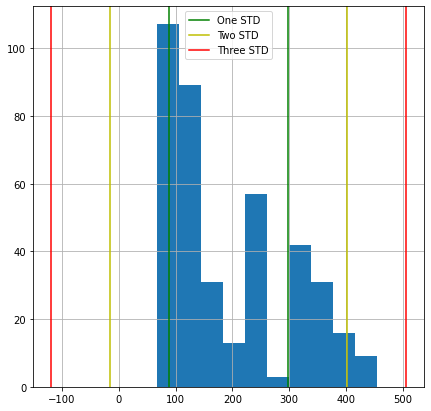

Attribue: HP
Summary:
N outside of two STD:	 23 	( 5.78 %)
N outside of three STD:	 4 	( 1.01 %)


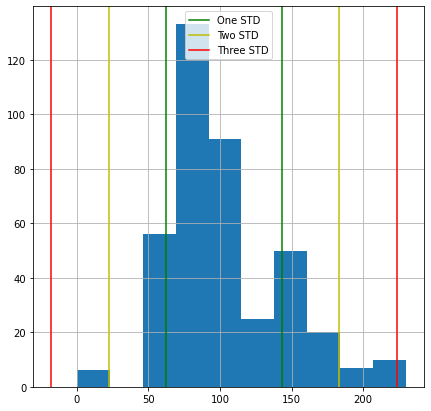

Attribue: WEIGHT
Summary:
N outside of two STD:	 11 	( 2.76 %)
N outside of three STD:	 0 	( 0.0 %)


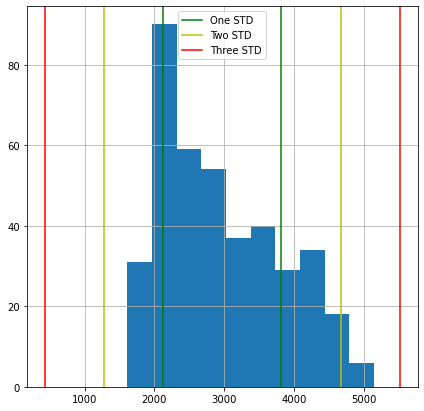

Attribue: ACC
Summary:
N outside of two STD:	 21 	( 5.28 %)
N outside of three STD:	 2 	( 0.5 %)


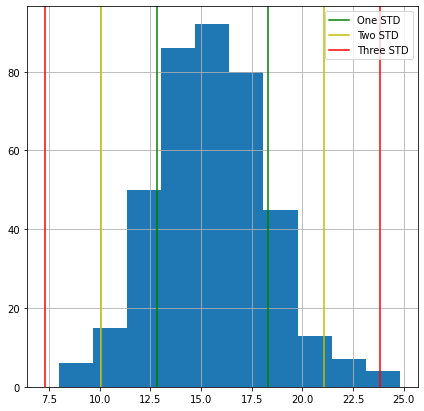

Attribue: MYEAR
Summary:
N outside of two STD:	 0 	( 0.0 %)
N outside of three STD:	 0 	( 0.0 %)


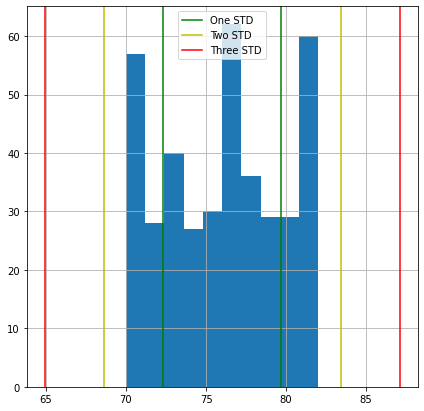

Attribue: ORIGIN
Summary:
N outside of two STD:	 0 	( 0.0 %)
N outside of three STD:	 0 	( 0.0 %)


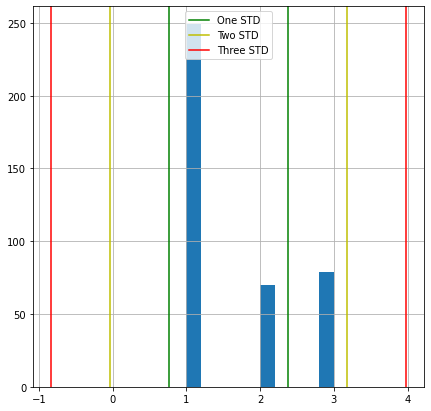

In [80]:

for attribute in colNames[:-1]:
    if data[attribute].dtype == 'int64' or data[attribute].dtype == 'float64': 
        plotAttribute(attribute)

<h4>10-fold cross validation</h4>

In [81]:
X = array[:,1:8]
Y = array[:,0]

num_folds = 10
seed = 1

kfold = KFold(n_splits=10, random_state=seed)

<h4>Linear regression & Root Mean Squared Error (RMSE)</h4>

Average Correlation Coefficient =  0.2646669458996735
RMSE: 3.8586854047742034


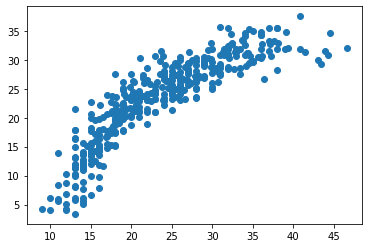

In [82]:
model = LinearRegression()

# Pearson coff
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Average Correlation Coefficient = ", results.mean())


#RMSE
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
rmse = math.sqrt(abs(results.mean()))
print("RMSE:", rmse)


# Plotting the predictions
y_pred = cross_val_predict(model, X, Y, cv=10)
plt.scatter(Y, y_pred)
plt.show()

<h4>Bayesian regression & Root Mean Squared Error (RMSE)</h4>

Average Correlation Coefficient =  0.27080291673922896
RMSE: 3.839996291050373


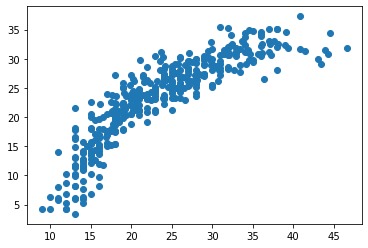

In [83]:

model = BayesianRidge()

# Pearson coff
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Average Correlation Coefficient = ", results.mean())

#RMSE
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
rmse = math.sqrt(abs(results.mean()))
print("RMSE:", rmse)

# Plotting the predictions
y_pred = cross_val_predict(model, X, Y, cv=10)
plt.scatter(Y, y_pred)
plt.show()

<p>Out of the 2 algorithms used to predict the class value, the Bayesian Ridge Regression algorithm performs better by having a slightly higher Pearson correlation coefficient and a lower RMSE.</p>